In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.base.model import LikelihoodModel
from sklearn import preprocessing

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import unicodedata
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

### - gdpr_website.dta - required for tables 4, 5, figures 2, 3, 4

In [37]:
data.co

Index(['EU_tld', 'after', 'cookies3', 'cookies_fb', 'date', 'eu_a1', 'eu_a2',
       'eu_a3', 'eu_a4', 'eu_a5', 'eu_alexa', 'eu_audience', 'eu_cb', 'eu_l1',
       'eu_l2', 'eu_l3', 'eu_lang', 'eu_location', 'eu_wi', 'exclude',
       'general', 'google', 'h', 'intl_tld', 'irequests3_fb', 'log_cookies3',
       'log_cookies3_fb', 'log_requests3', 'log_requests3_nonfb',
       'logx_cookies3', 'logx_requests3', 'md', 'multi_tld', 'neu_a1',
       'neu_a2', 'neu_a3', 'neu_a4', 'neu_a5', 'neu_l1', 'neu_l2', 'neu_l3',
       'noneu_audience', 'noneu_location', 'notgoogle', 'oneoverrank', 'rank',
       'requests3', 'requests_fb', 'requests_nonfb', 'square', 'top', 'trend',
       'trend_after', 'trend_EU-audience', 'trend_nonEU-audience',
       'trend_post_EU-audience', 'trend_post_nonEU-audience',
       'post_EU-audience', 'post_nonEU-audience'],
      dtype='object')

In [43]:
len(data['h'].unique())

110706

In [33]:
#data = pd.read_stata('/Users/zyy219/Dropbox/Econometric/mksc.2021.1339/data/gdpr_website.dta')

print(data.columns)
data['h']

Index(['EU_tld', 'after', 'cookies3', 'cookies_fb', 'date', 'eu_a1', 'eu_a2',
       'eu_a3', 'eu_a4', 'eu_a5', 'eu_alexa', 'eu_audience', 'eu_cb', 'eu_l1',
       'eu_l2', 'eu_l3', 'eu_lang', 'eu_location', 'eu_wi', 'exclude',
       'general', 'google', 'h', 'intl_tld', 'irequests3_fb', 'log_cookies3',
       'log_cookies3_fb', 'log_requests3', 'log_requests3_nonfb',
       'logx_cookies3', 'logx_requests3', 'md', 'multi_tld', 'neu_a1',
       'neu_a2', 'neu_a3', 'neu_a4', 'neu_a5', 'neu_l1', 'neu_l2', 'neu_l3',
       'noneu_audience', 'noneu_location', 'notgoogle', 'oneoverrank', 'rank',
       'requests3', 'requests_fb', 'requests_nonfb', 'square', 'top', 'trend',
       'trend_after'],
      dtype='object')


0               1.0
1               2.0
2               3.0
3               4.0
4               5.0
             ...   
4096117    110702.0
4096118    110703.0
4096119    110704.0
4096120    110705.0
4096121    110706.0
Name: h, Length: 4096122, dtype: float32

In [34]:
#data[['after','eu_audience','eu_location','trend','trend_after']]
data['trend_EU-audience'] = data['trend']*data['eu_audience']
data['trend_nonEU-audience'] = data['trend']*data['noneu_audience']
data['trend_post_EU-audience'] = data['trend']*data['after']*data['eu_audience']
data['trend_post_nonEU-audience'] = data['trend']*data['after']*data['noneu_audience']
data['post_EU-audience'] = data['after']*data['eu_audience']
data['post_nonEU-audience'] = data['after']*data['noneu_audience']

In [ ]:
D = data[['trend_EU-audience','trend_nonEU-audience','trend_post_EU-audience','trend_post_nonEU-audience','post_EU-audience'
         'post_nonEU-audience']]

In [5]:

def figure2_variable(data,location,audience):
    avg_log = []
    D = data[data['eu_audience'].isin([location]) & data['eu_location'].isin([audience])]
    for i in range(len(D['date'].unique())):
        D_temp = D[D['date'].isin([D['date'].unique()[i]])]
        avg_log.append(D_temp['logx_requests3'].mean()+1)
        
    return D['date'].unique(), avg_log

In [14]:
GDPR = np.datetime64('2018-05-25')

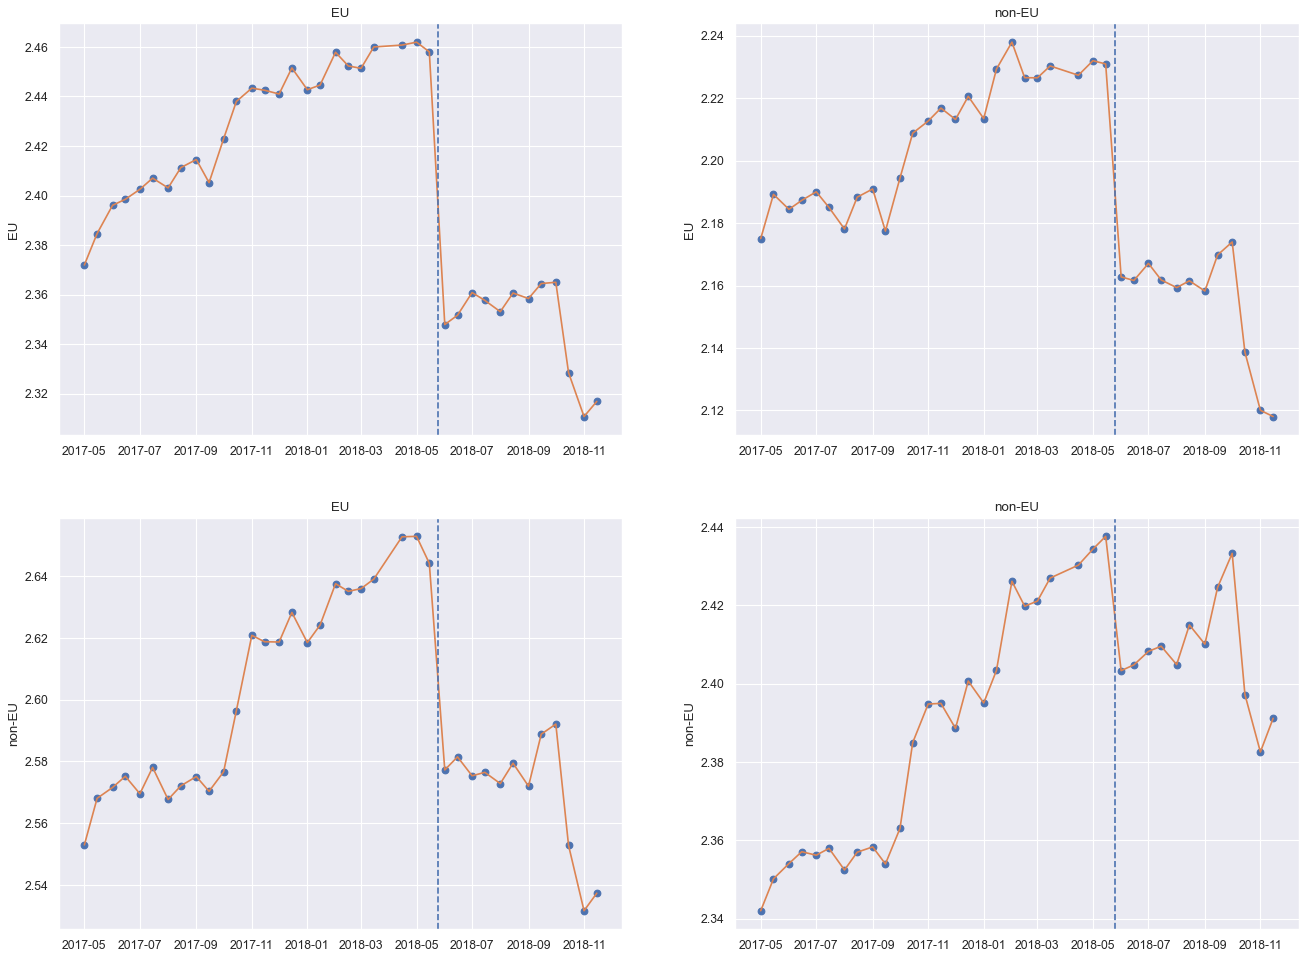

In [20]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(221)
x,y = figure2_variable(data,1,1)
#plt.ylim(2.36,2.44)
plt.plot_date(x,y)
plt.plot(x,y)
plt.title('EU')
plt.ylabel('EU')
plt.axvline(x = GDPR, color = 'b', linestyle = '--')
 


plt.subplot(222)
x,y = figure2_variable(data,0,1)
#plt.ylim(2.26,2.3)
plt.plot_date(x,y)
plt.plot(x,y)
plt.title('non-EU')
plt.ylabel('EU')
plt.axvline(x = GDPR, color = 'b', linestyle = '--')
 



plt.subplot(223)
x,y = figure2_variable(data,1,0)
#plt.ylim(2.56,2.64)
plt.plot_date(x,y)
plt.plot(x,y)
plt.title('EU')
plt.ylabel('non-EU')
plt.axvline(x = GDPR, color = 'b', linestyle = '--')
 


plt.subplot(224)
x,y = figure2_variable(data,0,0)
#plt.ylim(2.38,2.48)
plt.plot_date(x,y)
plt.plot(x,y)
plt.title('non-EU')
plt.ylabel('non-EU')
plt.axvline(x = GDPR, color = 'b', linestyle = '--')
 